In [14]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#t-SNE function

def plot_tsne(tsne_results, ax, **kwargs):

    plt.sca(ax)

    scatter_params = kwargs.get("scatter_params", {})
    ax.scatter(tsne_results[:, 0], tsne_results[:, 1], **scatter_params)
 
    if "set_title" in kwargs.keys():
        ax.set_title(**kwargs["set_title"])

    if "set_xlabel" in kwargs.keys():
        ax.set_xlabel(**kwargs["set_xlabel"])

    if "set_xlim" in kwargs.keys():
        ax.set_xlim(**kwargs["set_xlim"])
        
    if "set_xticks" in kwargs.keys():
        ax.set_xticks(**kwargs["set_xticks"])

    if "tick_params" in kwargs.keys():
        ax.tick_params(**kwargs["tick_params"])

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    
    if kwargs.get("color_bar", False):
        colorbar_ax = plt.colorbar(ax=ax, format='{x:.1f}')
        vmin, vmax = np.min(colorbar_ax.get_ticks()), np.max(colorbar_ax.get_ticks())
        colorbar_ax.mappable.set_clim(vmin=vmin, vmax=vmax)
        colorbar_ax.set_ticks(ticks = [vmin, vmax], labels=['Low', 'High'], size = 12)
        colorbar_ax.set_label(label='Feature value', size = 16, labelpad=20, y=0.5)
        colorbar_ax.outline.set_visible(False)
        colorbar_ax.ax.tick_params(axis='both', top=False, right=False, bottom=False, left=False)
    

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

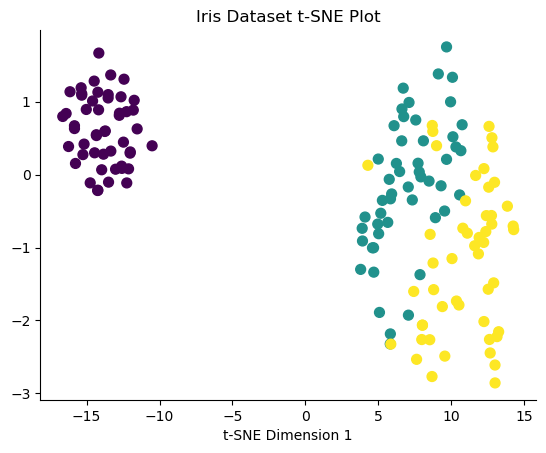

In [15]:
#function example

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)

fig, ax = plt.subplots()
plot_tsne(tsne_results, ax,
          scatter_params = {"c":y, "cmap" : "viridis", "s" : 50},
          set_title={"label": "Iris Dataset t-SNE Plot"},
          set_xlabel={"xlabel": "t-SNE Dimension 1"},
          color_bar=True)

   
plt.show()
